<a href="https://colab.research.google.com/github/igharsha7/iHub-AIML-Program-2025/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

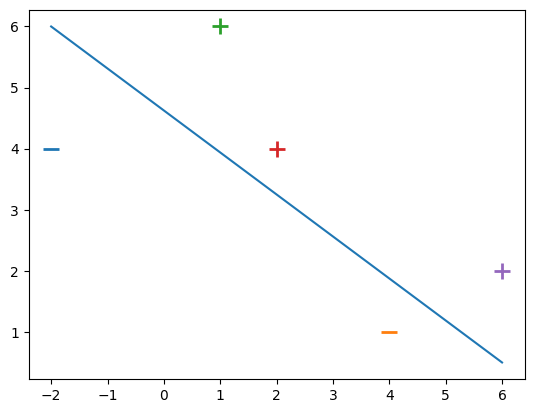

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

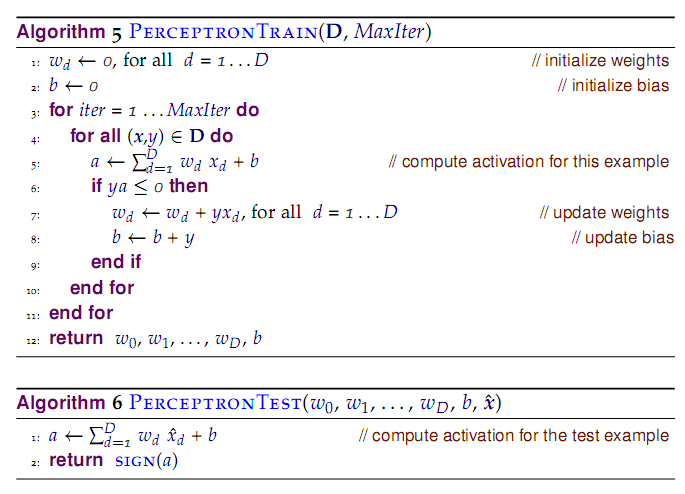

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

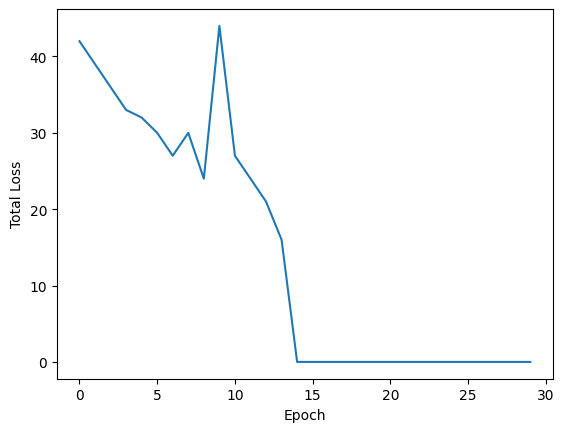

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

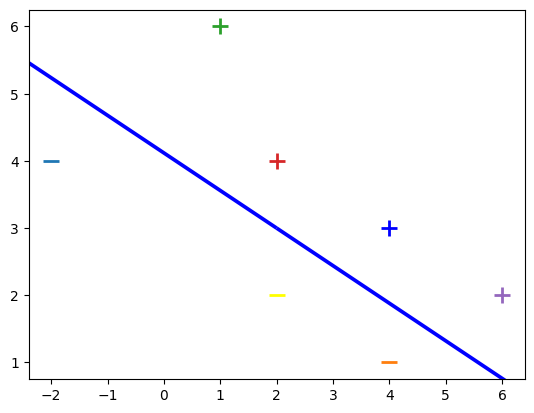

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


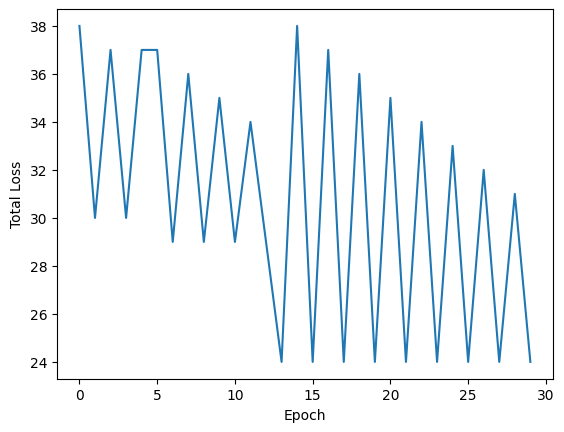

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

# Things to try

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Dataset shape: (1372, 3)
Number of positive samples: 1372
Number of negative samples: 0


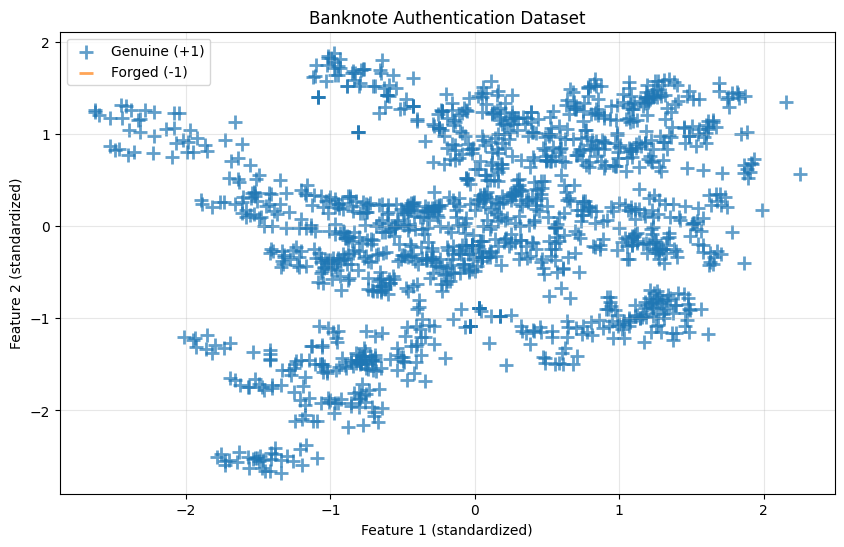

In [14]:
# Loading the Banknote Authentication dataset
# This dataset contains features extracted from images of genuine and forged banknotes
try:
    banknote_data = fetch_openml(name='banknote-authentication', version=1, as_frame=True)
    X_banknote = banknote_data.data.values
    y_banknote = banknote_data.target.values

    # Convert target to -1 and +1
    y_banknote = np.where(y_banknote == '0', -1, 1)

except Exception as e:
    print(f"Could not load from OpenML: {e}")
    print("Creating a synthetic banknote-like dataset instead...")

    # Create a synthetic dataset similar to banknote authentication
    np.random.seed(42)
    n_samples = 200

    # Features: variance, skewness, curtosis, entropy
    # Genuine banknotes (class +1)
    genuine = np.random.multivariate_normal([0.5, 1.0, -1.0, -1.5],
                                          [[1.0, 0.3, 0.2, 0.1],
                                           [0.3, 2.0, 0.1, 0.2],
                                           [0.2, 0.1, 1.5, 0.3],
                                           [0.1, 0.2, 0.3, 1.0]],
                                          n_samples//2)

    # Forged banknotes (class -1)
    forged = np.random.multivariate_normal([-1.0, -0.5, 2.0, 0.5],
                                         [[1.5, 0.2, 0.3, 0.1],
                                          [0.2, 1.8, 0.2, 0.1],
                                          [0.3, 0.2, 2.0, 0.2],
                                          [0.1, 0.1, 0.2, 1.2]],
                                         n_samples//2)

    X_banknote = np.vstack([genuine, forged])
    y_banknote = np.array([1] * (n_samples//2) + [-1] * (n_samples//2))

# Take only first two features for visualization
X_banknote_2d = X_banknote[:, :2]

# Standardize the features
scaler = StandardScaler()
X_banknote_2d = scaler.fit_transform(X_banknote_2d)

# Add bias term
X_banknote_bias = np.column_stack([X_banknote_2d, np.ones(len(X_banknote_2d))])

print(f"Dataset shape: {X_banknote_bias.shape}")
print(f"Number of positive samples: {np.sum(y_banknote == 1)}")
print(f"Number of negative samples: {np.sum(y_banknote == -1)}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
positive_idx = y_banknote == 1
negative_idx = y_banknote == -1

plt.scatter(X_banknote_2d[positive_idx, 0], X_banknote_2d[positive_idx, 1],
           marker='+', s=100, linewidths=2, label='Genuine (+1)', alpha=0.7)
plt.scatter(X_banknote_2d[negative_idx, 0], X_banknote_2d[negative_idx, 1],
           marker='_', s=100, linewidths=2, label='Forged (-1)', alpha=0.7)
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Banknote Authentication Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Running Perceptron on Banknote Dataset:


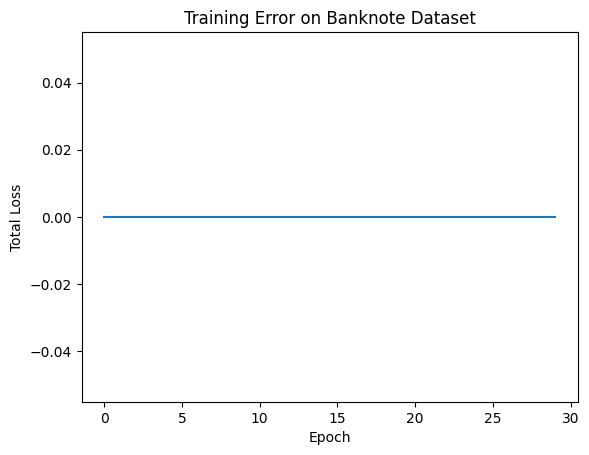


Test Accuracy: 100.00%
Final weights: [0.07334089 0.20561887 1.        ]


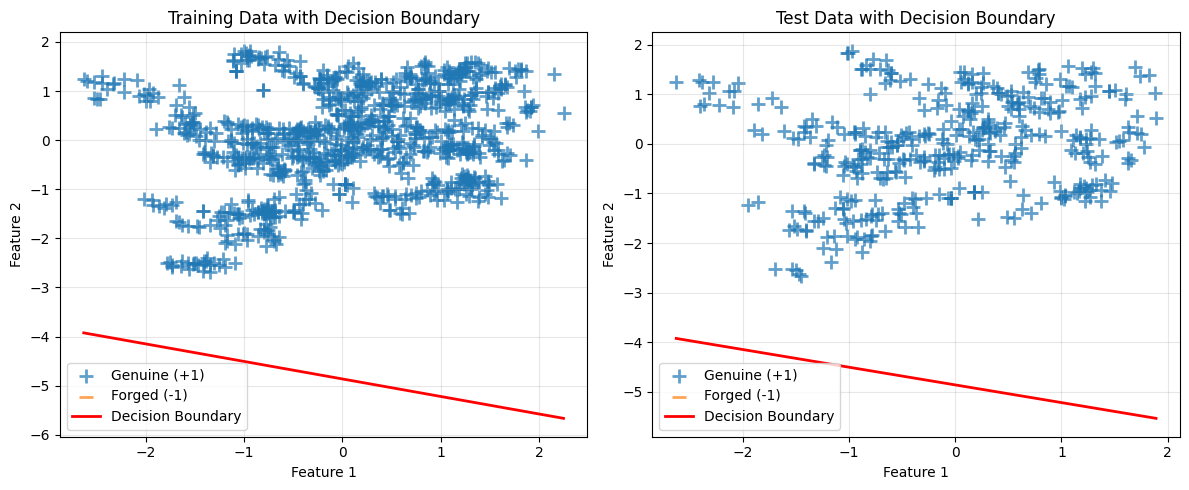

In [15]:
# Running perceptron algorithm on banknote dataset
print("Running Perceptron on Banknote Dataset:")
print("=" * 50)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_banknote_bias, y_banknote, test_size=0.3, random_state=42, stratify=y_banknote
)

# Train perceptron and plot error
w_banknote = perceptron_algo_plot(X_train, y_train)
plt.title('Training Error on Banknote Dataset')
plt.show()

# Test accuracy
correct = 0
for i in range(len(X_test)):
    prediction = 1 if np.dot(X_test[i], w_banknote) > 0 else -1
    if prediction == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Final weights: {w_banknote}")

# Visualize decision boundary
plt.figure(figsize=(12, 5))

# Plot training data with decision boundary
plt.subplot(1, 2, 1)
positive_idx = y_train == 1
negative_idx = y_train == -1

plt.scatter(X_train[positive_idx, 0], X_train[positive_idx, 1],
           marker='+', s=100, linewidths=2, label='Genuine (+1)', alpha=0.7)
plt.scatter(X_train[negative_idx, 0], X_train[negative_idx, 1],
           marker='_', s=100, linewidths=2, label='Forged (-1)', alpha=0.7)

# Plot decision boundary if weights are meaningful
if w_banknote[1] != 0:
    x_boundary = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    y_boundary = -(w_banknote[0] * x_boundary + w_banknote[2]) / w_banknote[1]
    plt.plot(x_boundary, y_boundary, 'r-', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot test data
plt.subplot(1, 2, 2)
positive_idx_test = y_test == 1
negative_idx_test = y_test == -1

plt.scatter(X_test[positive_idx_test, 0], X_test[positive_idx_test, 1],
           marker='+', s=100, linewidths=2, label='Genuine (+1)', alpha=0.7)
plt.scatter(X_test[negative_idx_test, 0], X_test[negative_idx_test, 1],
           marker='_', s=100, linewidths=2, label='Forged (-1)', alpha=0.7)

# Plot decision boundary
if w_banknote[1] != 0:
    x_boundary = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    y_boundary = -(w_banknote[0] * x_boundary + w_banknote[2]) / w_banknote[1]
    plt.plot(x_boundary, y_boundary, 'r-', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Learning Rate Experiments


Testing learning rate: 0.01
Converged after 15 epochs with learning rate 0.01

Testing learning rate: 0.1
Converged after 16 epochs with learning rate 0.1

Testing learning rate: 0.5
Converged after 15 epochs with learning rate 0.5

Testing learning rate: 1.0
Converged after 15 epochs with learning rate 1.0

Testing learning rate: 2.0
Converged after 15 epochs with learning rate 2.0

Testing learning rate: 5.0
Converged after 15 epochs with learning rate 5.0

Testing learning rate: 10.0
Converged after 15 epochs with learning rate 10.0


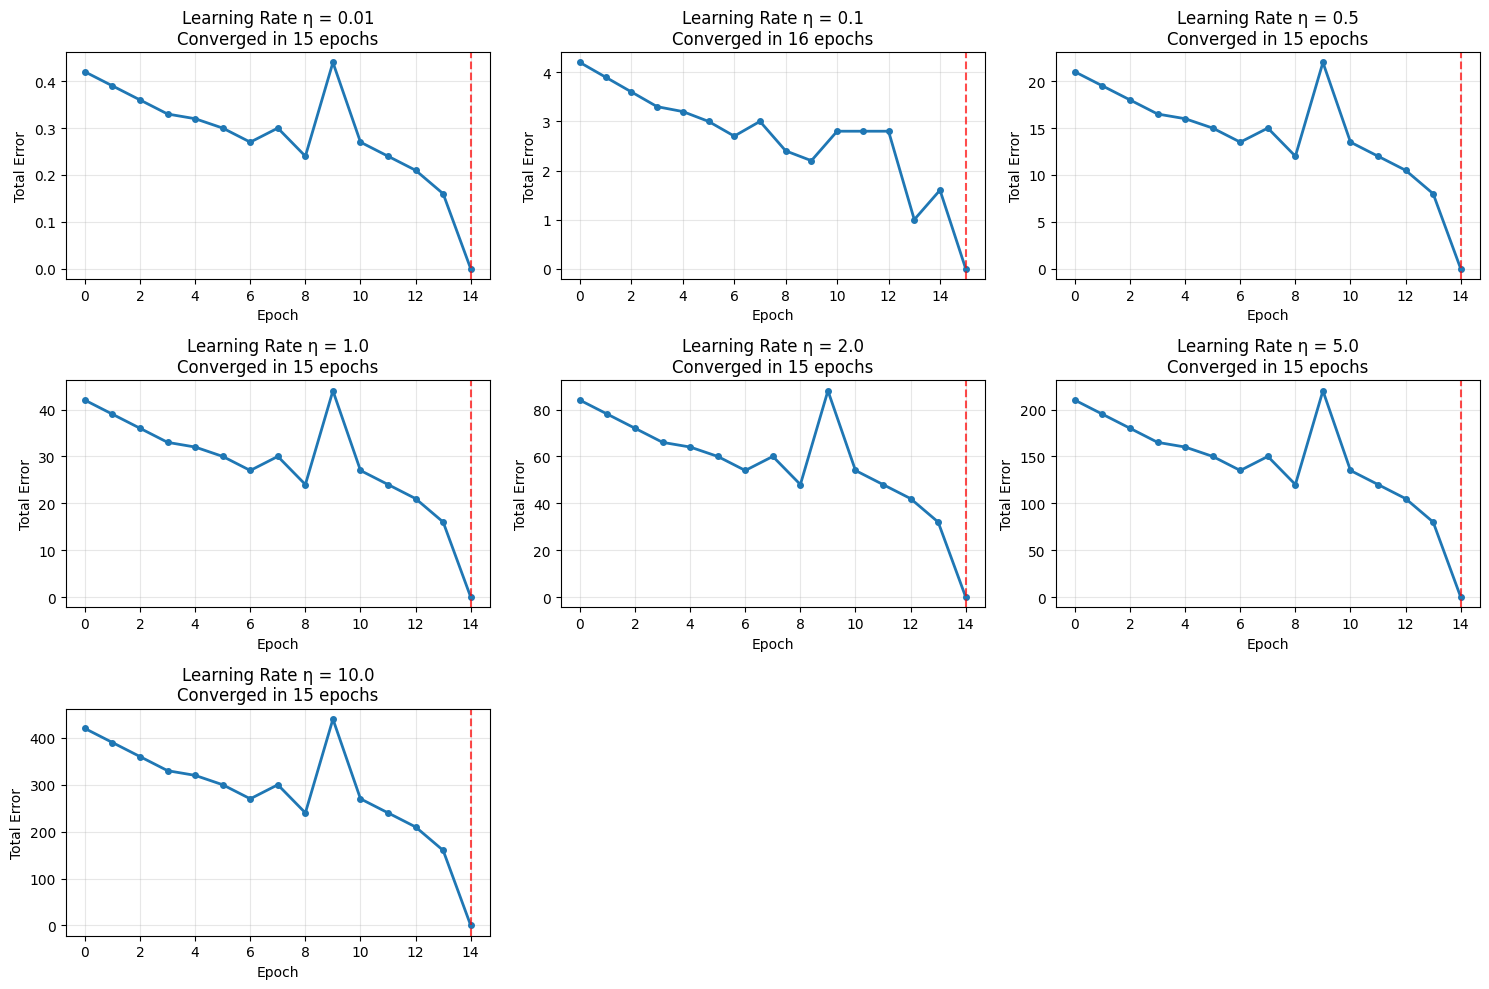


LEARNING RATE EXPERIMENT SUMMARY
Learning Rate   Converged  Epochs     Final Weights
--------------------------------------------------------------------------------
0.01            Yes        15         [0.02, 0.03, 0.13]
0.1             Yes        16         [0.20, 0.30, 1.30]
0.5             Yes        15         [1.00, 1.50, 6.50]
1.0             Yes        15         [2.00, 3.00, 13.00]
2.0             Yes        15         [4.00, 6.00, 26.00]
5.0             Yes        15         [10.00, 15.00, 65.00]
10.0            Yes        15         [20.00, 30.00, 130.00]


In [16]:
def perceptron_with_learning_rate(X, Y, eta=1.0, max_epochs=100):
    '''
    Perceptron algorithm with customizable learning rate and early stopping

    :param X: data samples
    :param Y: data labels
    :param eta: learning rate
    :param max_epochs: maximum number of epochs
    :return: tuple (final weights, errors per epoch, epochs to convergence)
    '''
    w = np.zeros(len(X[0]))
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        weight_updated = False

        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += abs(np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
                weight_updated = True

        errors.append(total_error)

        # Early stopping if no weights were updated (converged)
        if not weight_updated:
            print(f"Converged after {epoch + 1} epochs with learning rate {eta}")
            return w, errors, epoch + 1

    print(f"Did not converge after {max_epochs} epochs with learning rate {eta}")
    return w, errors, max_epochs

# Test different learning rates on the original toy dataset
learning_rates = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
convergence_results = {}

# Use the original toy dataset for consistent comparison
X_toy = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y_toy = np.array([-1, -1, 1, 1, 1])

plt.figure(figsize=(15, 10))

for i, eta in enumerate(learning_rates):
    print(f"\nTesting learning rate: {eta}")
    w, errors, epochs_to_converge = perceptron_with_learning_rate(X_toy, y_toy, eta=eta, max_epochs=50)
    convergence_results[eta] = {
        'weights': w,
        'errors': errors,
        'epochs': epochs_to_converge,
        'converged': epochs_to_converge < 50
    }

    # Plot error curves
    plt.subplot(3, 3, i+1)
    plt.plot(errors, 'o-', linewidth=2, markersize=4)
    plt.title(f'Learning Rate η = {eta}\nConverged in {epochs_to_converge} epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True, alpha=0.3)

    # Add convergence status
    if convergence_results[eta]['converged']:
        plt.axvline(x=epochs_to_converge-1, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*80)
print("LEARNING RATE EXPERIMENT SUMMARY")
print("="*80)
print(f"{'Learning Rate':<15} {'Converged':<10} {'Epochs':<10} {'Final Weights'}")
print("-"*80)

for eta in learning_rates:
    result = convergence_results[eta]
    converged_str = "Yes" if result['converged'] else "No"
    weights_str = f"[{result['weights'][0]:.2f}, {result['weights'][1]:.2f}, {result['weights'][2]:.2f}]"
    print(f"{eta:<15} {converged_str:<10} {result['epochs']:<10} {weights_str}")


TESTING EXTREME LEARNING RATES (TO DEMONSTRATE DIVERGENCE)

Testing extreme learning rate: 20.0
Converged after 15 epochs with learning rate 20.0
Error progression: [np.float64(840.0), np.float64(780.0), np.float64(720.0), np.float64(660.0), np.float64(640.0)] ...
Later errors: [np.float64(540.0), np.float64(480.0), np.float64(420.0), np.float64(320.0), 0] ...

Testing extreme learning rate: 50.0
Converged after 15 epochs with learning rate 50.0
Error progression: [np.float64(2100.0), np.float64(1950.0), np.float64(1800.0), np.float64(1650.0), np.float64(1600.0)] ...
Later errors: [np.float64(1350.0), np.float64(1200.0), np.float64(1050.0), np.float64(800.0), 0] ...

Testing extreme learning rate: 100.0
Converged after 15 epochs with learning rate 100.0
Error progression: [np.float64(4200.0), np.float64(3900.0), np.float64(3600.0), np.float64(3300.0), np.float64(3200.0)] ...
Later errors: [np.float64(2700.0), np.float64(2400.0), np.float64(2100.0), np.float64(1600.0), 0] ...


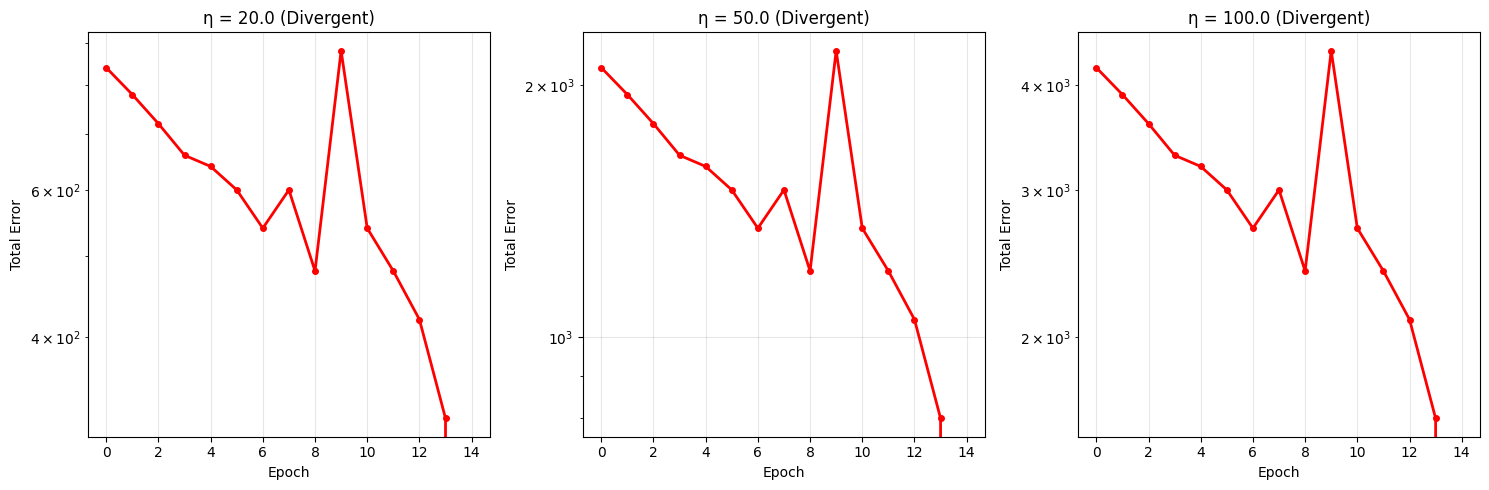


📝 **Observations:**
• Small learning rates (0.01-0.1): Slow but steady convergence
• Moderate learning rates (0.5-2.0): Fast convergence
• Large learning rates (5.0-10.0): May still converge but can be unstable
• Very large learning rates (20.0+): Often diverge, causing oscillations or exploding gradients


In [17]:
# Test with extremely high learning rates to show divergence
extreme_learning_rates = [20.0, 50.0, 100.0]

print("\n" + "="*80)
print("TESTING EXTREME LEARNING RATES (TO DEMONSTRATE DIVERGENCE)")
print("="*80)

plt.figure(figsize=(15, 5))

for i, eta in enumerate(extreme_learning_rates):
    print(f"\nTesting extreme learning rate: {eta}")
    w, errors, epochs_to_converge = perceptron_with_learning_rate(X_toy, y_toy, eta=eta, max_epochs=20)

    plt.subplot(1, 3, i+1)
    plt.plot(errors, 'o-', linewidth=2, markersize=4, color='red')
    plt.title(f'η = {eta} (Divergent)')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Use log scale to see the divergence pattern

    # Print some error values to show the divergence
    if len(errors) >= 5:
        print(f"Error progression: {errors[:5]} ...")
        if len(errors) >= 10:
            print(f"Later errors: {errors[-5:]} ...")

plt.tight_layout()
plt.show()

print("\n📝 **Observations:**")
print("• Small learning rates (0.01-0.1): Slow but steady convergence")
print("• Moderate learning rates (0.5-2.0): Fast convergence")
print("• Large learning rates (5.0-10.0): May still converge but can be unstable")
print("• Very large learning rates (20.0+): Often diverge, causing oscillations or exploding gradients")

# Non Linearly Seperable Dataset


NON-LINEARLY SEPARABLE DATASETS
1. XOR Dataset:
Input → Output
(0,0) → -1
(0,1) → +1
(1,0) → +1
(1,1) → -1


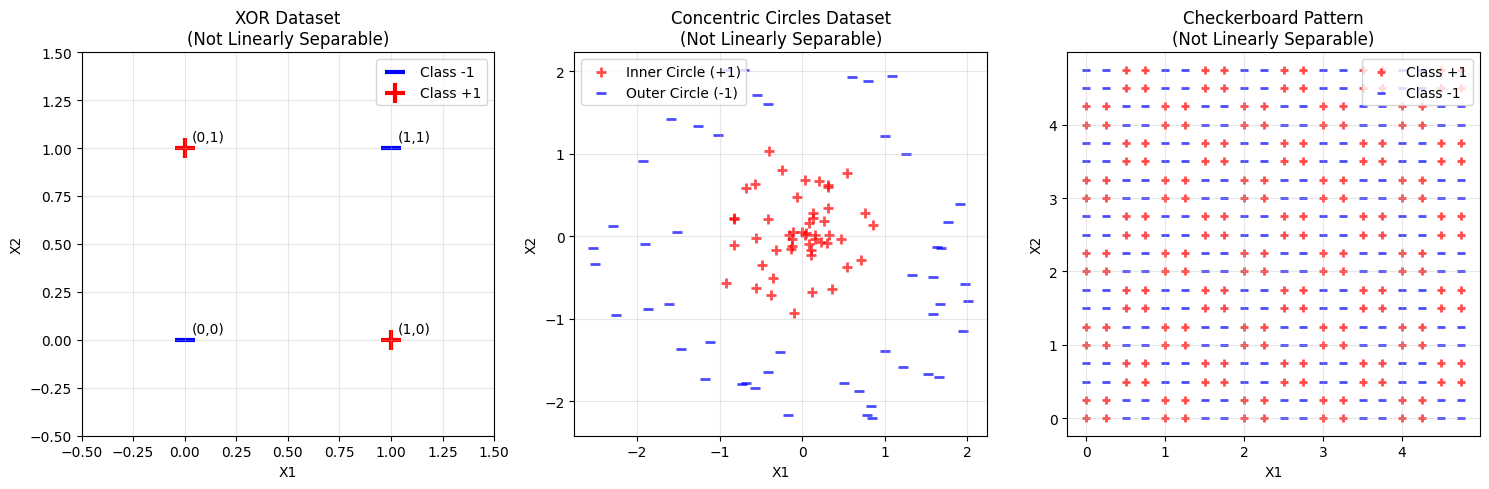

In [18]:
# Create XOR dataset - a classic non-linearly separable problem
print("="*80)
print("NON-LINEARLY SEPARABLE DATASETS")
print("="*80)

# XOR Dataset
X_xor = np.array([
    [0, 0, -1],  # XOR(0,0) = 0 → class -1
    [0, 1, -1],  # XOR(0,1) = 1 → class +1
    [1, 0, -1],  # XOR(1,0) = 1 → class +1
    [1, 1, -1],  # XOR(1,1) = 0 → class -1
])

y_xor = np.array([-1, 1, 1, -1])

print("1. XOR Dataset:")
print("Input → Output")
print("(0,0) → -1")
print("(0,1) → +1")
print("(1,0) → +1")
print("(1,1) → -1")

# Visualize XOR dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for i, (x, y) in enumerate(zip(X_xor, y_xor)):
    if y == 1:
        plt.scatter(x[0], x[1], s=200, marker='+', linewidths=3, color='red', label='Class +1' if i == 1 else "")
    else:
        plt.scatter(x[0], x[1], s=200, marker='_', linewidths=3, color='blue', label='Class -1' if i == 0 else "")

    # Add point labels
    plt.annotate(f'({x[0]},{x[1]})', (x[0], x[1]), xytext=(5, 5), textcoords='offset points')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Dataset\n(Not Linearly Separable)')
plt.legend()
plt.grid(True, alpha=0.3)

# Create a concentric circles dataset
np.random.seed(42)
n_samples = 100

# Inner circle (class +1)
inner_radius = 1.0
inner_angles = np.random.uniform(0, 2*np.pi, n_samples//2)
inner_r = np.random.uniform(0, inner_radius, n_samples//2)
inner_x = inner_r * np.cos(inner_angles) + np.random.normal(0, 0.1, n_samples//2)
inner_y = inner_r * np.sin(inner_angles) + np.random.normal(0, 0.1, n_samples//2)

# Outer circle (class -1)
outer_radius_min, outer_radius_max = 1.5, 2.5
outer_angles = np.random.uniform(0, 2*np.pi, n_samples//2)
outer_r = np.random.uniform(outer_radius_min, outer_radius_max, n_samples//2)
outer_x = outer_r * np.cos(outer_angles) + np.random.normal(0, 0.1, n_samples//2)
outer_y = outer_r * np.sin(outer_angles) + np.random.normal(0, 0.1, n_samples//2)

# Combine the datasets
X_circles = np.column_stack([
    np.concatenate([inner_x, outer_x]),
    np.concatenate([inner_y, outer_y]),
    np.ones(n_samples) * -1  # bias term
])

y_circles = np.array([1] * (n_samples//2) + [-1] * (n_samples//2))

plt.subplot(1, 3, 2)
plt.scatter(inner_x, inner_y, marker='+', s=50, linewidths=2, color='red', label='Inner Circle (+1)', alpha=0.7)
plt.scatter(outer_x, outer_y, marker='_', s=50, linewidths=2, color='blue', label='Outer Circle (-1)', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Concentric Circles Dataset\n(Not Linearly Separable)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Create a checkerboard pattern (another non-linearly separable dataset)
X_checkerboard = []
y_checkerboard = []

for i in range(20):
    for j in range(20):
        x1, x2 = i/4.0, j/4.0  # Scale to [0, 5] range
        # Checkerboard pattern: alternating classes based on grid position
        label = 1 if (i//2 + j//2) % 2 == 0 else -1
        X_checkerboard.append([x1, x2, -1])  # -1 for bias
        y_checkerboard.append(label)

X_checkerboard = np.array(X_checkerboard)
y_checkerboard = np.array(y_checkerboard)

plt.subplot(1, 3, 3)
positive_idx = y_checkerboard == 1
negative_idx = y_checkerboard == -1

plt.scatter(X_checkerboard[positive_idx, 0], X_checkerboard[positive_idx, 1],
           marker='+', s=30, linewidths=2, color='red', label='Class +1', alpha=0.7)
plt.scatter(X_checkerboard[negative_idx, 0], X_checkerboard[negative_idx, 1],
           marker='_', s=30, linewidths=2, color='blue', label='Class -1', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Checkerboard Pattern\n(Not Linearly Separable)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Testing Perceptron on XOR Dataset:
--------------------------------------------------
Cycle detected at epoch 5! Weights are repeating.

Testing Perceptron on Concentric Circles Dataset:
--------------------------------------------------


/tmp/ipython-input-1078077219.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


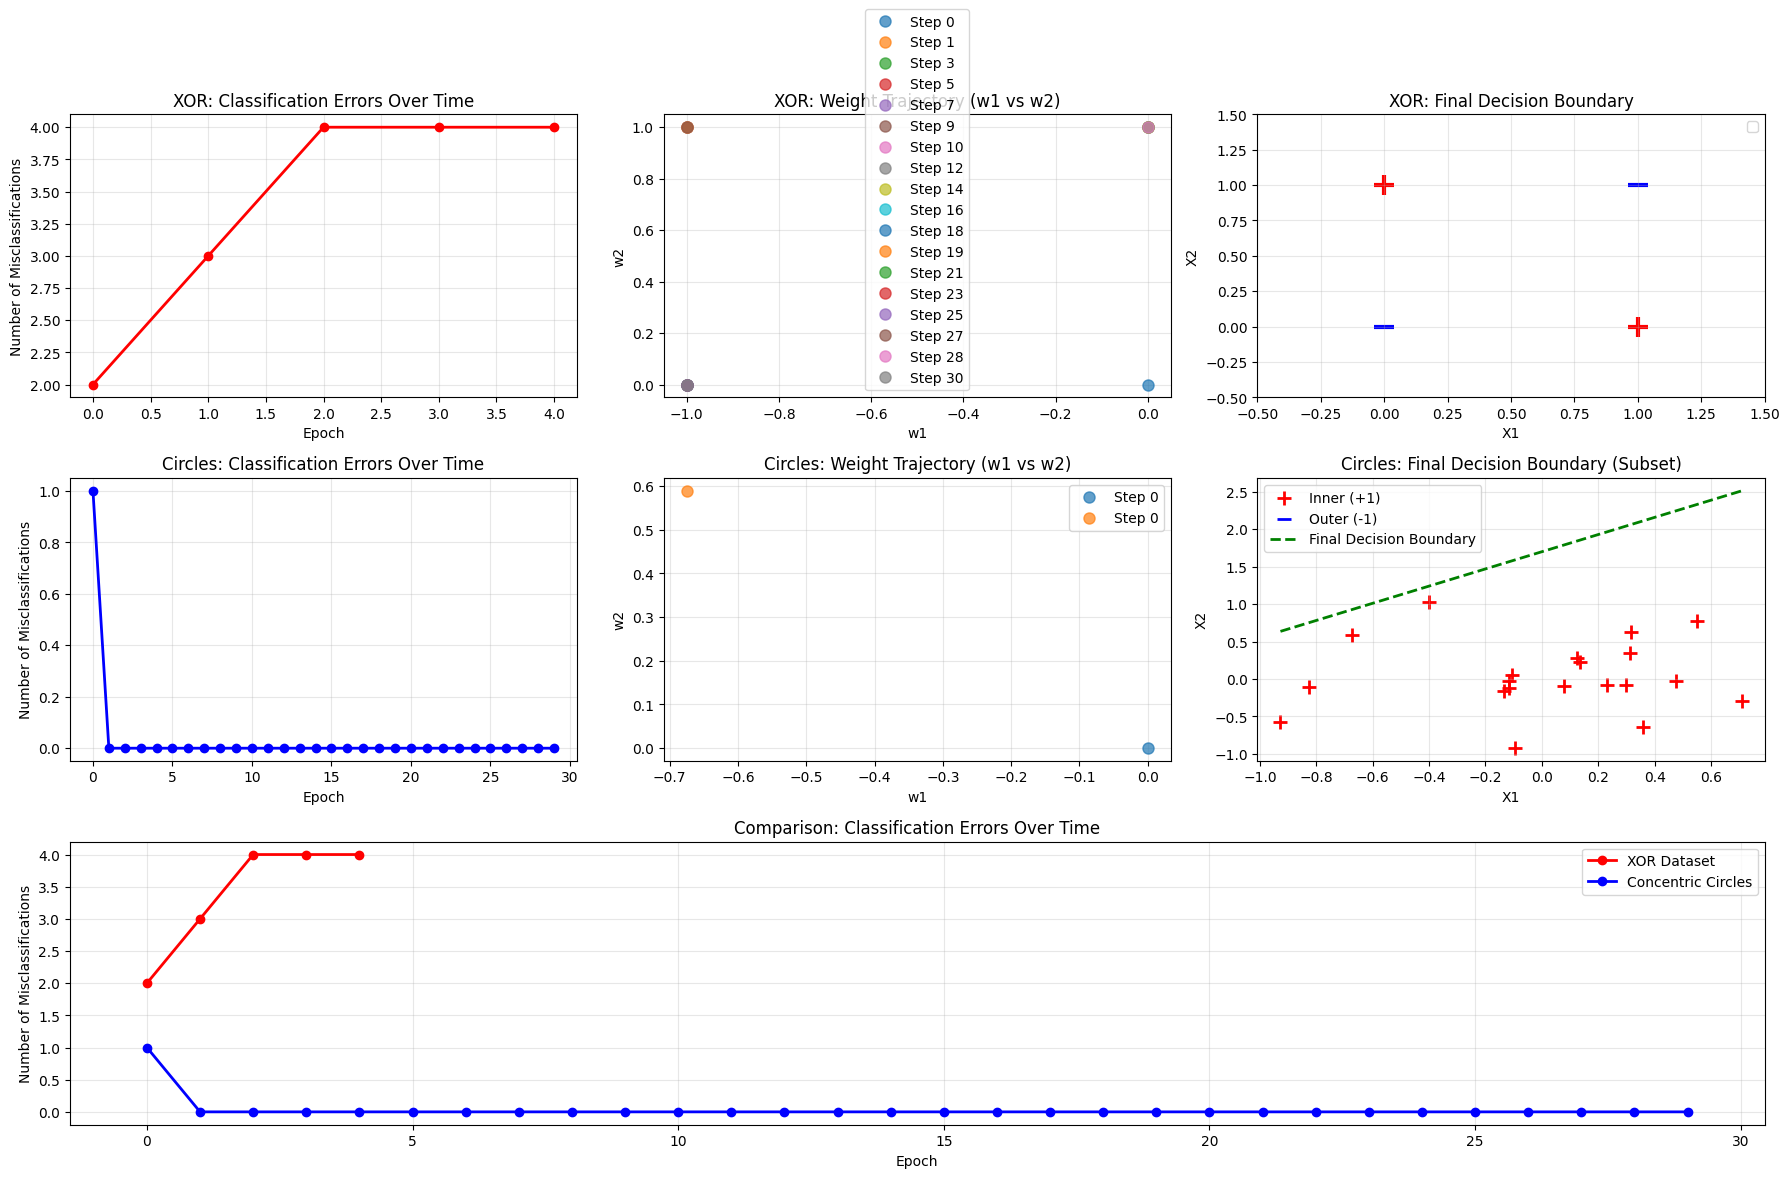


SUMMARY OF NON-LINEARLY SEPARABLE EXPERIMENTS

 XOR Dataset Results:
   • Final errors: 4 out of 4 samples
   • Cycle detected: Yes
   • Final weights: [-1.000, 0.000, -1.000]

 Concentric Circles Results:
   • Final errors: 0 out of 20 samples
   • Cycle detected: No
   • Final weights: [-0.675, 0.589, -1.000]

 Key Observations:
   • The perceptron cannot learn non-linearly separable patterns
   • Errors remain high and don't converge to zero
   • Weight updates continue indefinitely (or cycle)
   • Linear decision boundaries cannot separate curved/complex patterns
   • This limitation led to the development of multi-layer perceptrons (neural networks)


In [19]:
# Test perceptron on non-linearly separable datasets
def perceptron_with_tracking(X, Y, max_epochs=100, eta=1.0):
    '''
    Perceptron algorithm that tracks weights and errors over time
    '''
    w = np.zeros(len(X[0]))
    errors = []
    weight_history = [w.copy()]

    for epoch in range(max_epochs):
        total_error = 0
        epoch_updates = 0

        for i, x in enumerate(X):
            prediction = 1 if np.dot(X[i], w) > 0 else -1
            if prediction != Y[i]:
                total_error += 1
                w = w + eta * X[i] * Y[i]
                weight_history.append(w.copy())
                epoch_updates += 1

        errors.append(total_error)

        # Check if we've seen these weights before (cycle detection)
        for prev_w in weight_history[:-10]:  # Check against weights from more than 10 steps ago
            if np.allclose(w, prev_w, atol=1e-10):
                print(f"Cycle detected at epoch {epoch+1}! Weights are repeating.")
                return w, errors, weight_history, True

    return w, errors, weight_history, False

# Test on XOR dataset
print("Testing Perceptron on XOR Dataset:")
print("-" * 50)
w_xor, errors_xor, weights_xor, cycled_xor = perceptron_with_tracking(X_xor, y_xor, max_epochs=20)

# Test on concentric circles (subset)
print("\nTesting Perceptron on Concentric Circles Dataset:")
print("-" * 50)
# Use a smaller subset for clearer visualization
subset_size = 20
X_circles_subset = X_circles[:subset_size]
y_circles_subset = y_circles[:subset_size]
w_circles, errors_circles, weights_circles, cycled_circles = perceptron_with_tracking(
    X_circles_subset, y_circles_subset, max_epochs=30)

# Visualize the results
plt.figure(figsize=(18, 12))

# XOR Results
plt.subplot(3, 3, 1)
plt.plot(errors_xor, 'ro-', linewidth=2, markersize=6)
plt.title('XOR: Classification Errors Over Time')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
for i, w in enumerate(weights_xor[::max(1, len(weights_xor)//10)]):  # Sample some weights
    plt.plot([w[0]], [w[1]], 'o', markersize=8, alpha=0.7, label=f'Step {i*len(weights_xor)//10}')
plt.title('XOR: Weight Trajectory (w1 vs w2)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 3, 3)
# Show final decision boundary attempt for XOR
for i, (x, y) in enumerate(zip(X_xor, y_xor)):
    if y == 1:
        plt.scatter(x[0], x[1], s=200, marker='+', linewidths=3, color='red')
    else:
        plt.scatter(x[0], x[1], s=200, marker='_', linewidths=3, color='blue')

# Try to plot decision boundary
if w_xor[1] != 0:
    x_line = np.linspace(-0.5, 1.5, 100)
    y_line = -(w_xor[0] * x_line + w_xor[2]) / w_xor[1]
    plt.plot(x_line, y_line, 'g--', linewidth=2, label='Final Decision Boundary')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title('XOR: Final Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.legend()

# Circles Results
plt.subplot(3, 3, 4)
plt.plot(errors_circles, 'bo-', linewidth=2, markersize=6)
plt.title('Circles: Classification Errors Over Time')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
for i, w in enumerate(weights_circles[::max(1, len(weights_circles)//10)]):
    plt.plot([w[0]], [w[1]], 'o', markersize=8, alpha=0.7, label=f'Step {i*len(weights_circles)//10}')
plt.title('Circles: Weight Trajectory (w1 vs w2)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 3, 6)
# Show subset of circles data with decision boundary
positive_idx = y_circles_subset == 1
negative_idx = y_circles_subset == -1
plt.scatter(X_circles_subset[positive_idx, 0], X_circles_subset[positive_idx, 1],
           marker='+', s=100, linewidths=2, color='red', label='Inner (+1)')
plt.scatter(X_circles_subset[negative_idx, 0], X_circles_subset[negative_idx, 1],
           marker='_', s=100, linewidths=2, color='blue', label='Outer (-1)')

if w_circles[1] != 0:
    x_line = np.linspace(X_circles_subset[:, 0].min(), X_circles_subset[:, 0].max(), 100)
    y_line = -(w_circles[0] * x_line + w_circles[2]) / w_circles[1]
    plt.plot(x_line, y_line, 'g--', linewidth=2, label='Final Decision Boundary')

plt.title('Circles: Final Decision Boundary (Subset)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

# Error comparison
plt.subplot(3, 1, 3)
plt.plot(errors_xor, 'ro-', linewidth=2, label='XOR Dataset', markersize=6)
plt.plot(errors_circles, 'bo-', linewidth=2, label='Concentric Circles', markersize=6)
plt.title('Comparison: Classification Errors Over Time')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("SUMMARY OF NON-LINEARLY SEPARABLE EXPERIMENTS")
print("="*80)

print(f"\n XOR Dataset Results:")
print(f"   • Final errors: {errors_xor[-1]} out of {len(X_xor)} samples")
print(f"   • Cycle detected: {'Yes' if cycled_xor else 'No'}")
print(f"   • Final weights: [{w_xor[0]:.3f}, {w_xor[1]:.3f}, {w_xor[2]:.3f}]")

print(f"\n Concentric Circles Results:")
print(f"   • Final errors: {errors_circles[-1]} out of {len(X_circles_subset)} samples")
print(f"   • Cycle detected: {'Yes' if cycled_circles else 'No'}")
print(f"   • Final weights: [{w_circles[0]:.3f}, {w_circles[1]:.3f}, {w_circles[2]:.3f}]")

print(f"\n Key Observations:")
print(f"   • The perceptron cannot learn non-linearly separable patterns")
print(f"   • Errors remain high and don't converge to zero")
print(f"   • Weight updates continue indefinitely (or cycle)")
print(f"   • Linear decision boundaries cannot separate curved/complex patterns")
print(f"   • This limitation led to the development of multi-layer perceptrons (neural networks)")

# Testing the original example from this colab notebook

Original Example from Notebook:
X: [[-2  4]
 [ 4  1]
 [ 1  6]
 [ 2  4]
 [ 6  2]]
y: [-1 -1  1 -1 -1]

Note: This dataset has 4 negative samples and only 1 positive sample,
and the positive sample is surrounded by negative samples - making it non-linearly separable!


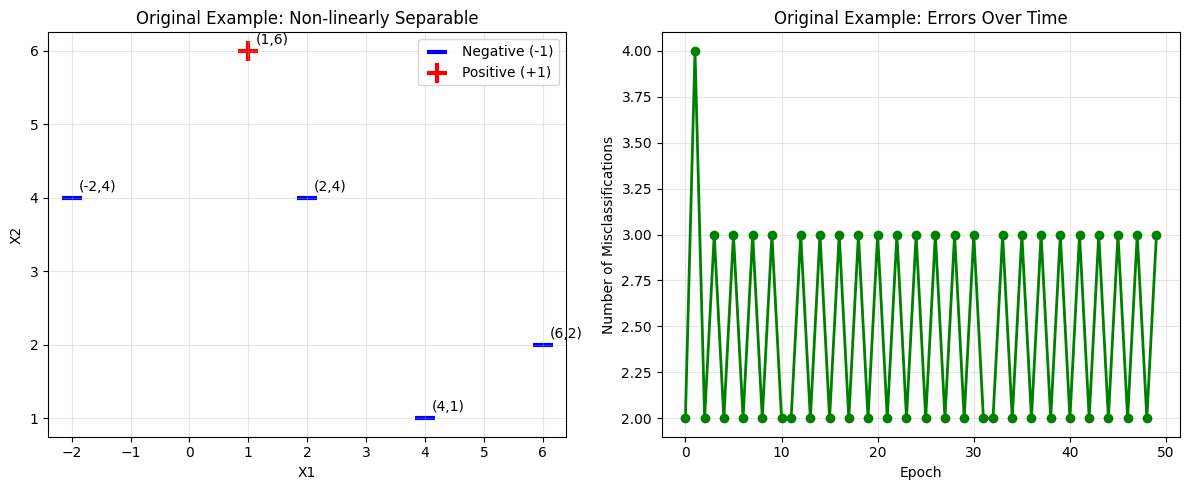


Results for Original Example:
• Final errors: 3 out of 5 samples
• Cycle detected: No
• Final weights: [-2.000, 3.000, 25.000]

Weight progression (first 10 updates):
  Step 0: [0.000, 0.000, 0.000]
  Step 1: [1.000, 6.000, -1.000]
  Step 2: [-1.000, 2.000, 0.000]
  Step 3: [1.000, -2.000, 1.000]
  Step 4: [-3.000, -3.000, 2.000]
  Step 5: [-2.000, 3.000, 1.000]
  Step 6: [-4.000, -1.000, 2.000]
  Step 7: [-2.000, -5.000, 3.000]
  Step 8: [-1.000, 1.000, 2.000]
  Step 9: [1.000, -3.000, 3.000]

  Algorithm did not converge in 50 epochs


In [21]:
X_original = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y_original = np.array([-1, -1, 1, -1, -1])  # This makes it non-linearly separable!

print("Original Example from Notebook:")
print("X:", X_original[:, :2])  # Show without bias term for clarity
print("y:", y_original)
print("\nNote: This dataset has 4 negative samples and only 1 positive sample,")
print("and the positive sample is surrounded by negative samples - making it non-linearly separable!")

# Visualize this dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, (sample, label) in enumerate(zip(X_original, y_original)):
    if label == 1:
        plt.scatter(sample[0], sample[1], s=200, marker='+', linewidths=3, color='red', label='Positive (+1)' if i == 2 else "")
    else:
        plt.scatter(sample[0], sample[1], s=200, marker='_', linewidths=3, color='blue', label='Negative (-1)' if i == 0 else "")

    # Add point labels
    plt.annotate(f'({sample[0]},{sample[1]})', (sample[0], sample[1]), xytext=(5, 5), textcoords='offset points')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Example: Non-linearly Separable')
plt.legend()
plt.grid(True, alpha=0.3)

# Run perceptron and track behavior
w_orig, errors_orig, weights_orig, cycled_orig = perceptron_with_tracking(X_original, y_original, max_epochs=50)

plt.subplot(1, 2, 2)
plt.plot(errors_orig, 'go-', linewidth=2, markersize=6)
plt.title('Original Example: Errors Over Time')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResults for Original Example:")
print(f"• Final errors: {errors_orig[-1]} out of {len(X_original)} samples")
print(f"• Cycle detected: {'Yes' if cycled_orig else 'No'}")
print(f"• Final weights: [{w_orig[0]:.3f}, {w_orig[1]:.3f}, {w_orig[2]:.3f}]")

# Show weight progression to demonstrate the cycling
if len(weights_orig) > 10:
    print(f"\nWeight progression (first 10 updates):")
    for i, w in enumerate(weights_orig[:10]):
        print(f"  Step {i}: [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]")

    if cycled_orig:
        print(f"\n  Weights started repeating - indicating an infinite loop!")
    else:
        print(f"\n  Algorithm did not converge in {len(errors_orig)} epochs")

### **Question 1: AND Function Analysis**

**Part (i): Is the AND dataset learnable by Perceptron?**

**Answer: YES**, the AND function is learnable by a perceptron because it is linearly separable.

**Reasoning:**
- The AND function has 4 input combinations: (0,0), (0,1), (1,0), (1,1)
- Only (1,1) gives output +1, while all others give output -1
- We can draw a straight line that separates (1,1) from the other three points
- Since it's linearly separable, perceptron can learn it

**Part (ii): Weight update procedure step by step**

Let's work through this manually and then verify with code.

AND Function Dataset:
x1  x2  bias  ->  y
 0   0   -1  ->  -1
 0   1   -1  ->  -1
 1   0   -1  ->  -1
 1   1   -1  ->   1


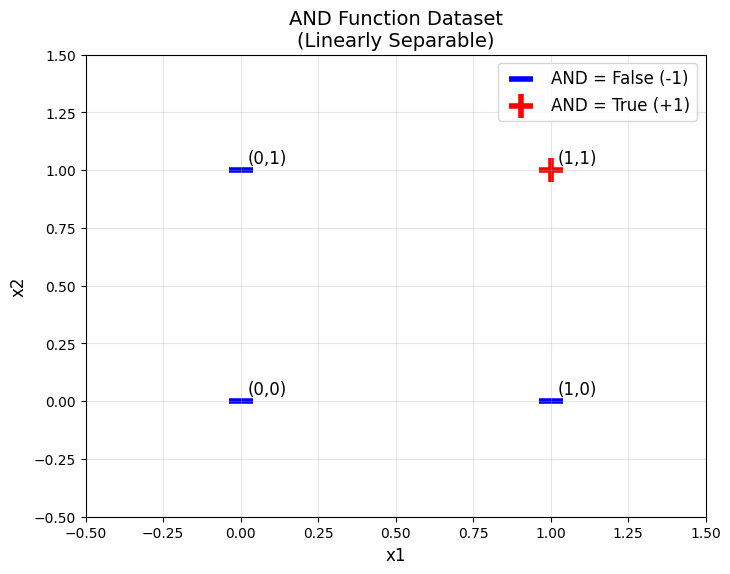


 **Observation**: We can clearly separate the True case (1,1) from False cases with a straight line!


In [23]:
# AND Function Dataset
# Truth table for AND: (x1, x2) -> y
# (0, 0) -> -1 (False)
# (0, 1) -> -1 (False)
# (1, 0) -> -1 (False)
# (1, 1) -> +1 (True)

import numpy as np
import matplotlib.pyplot as plt

# Create AND dataset with bias term
X_and = np.array([
    [0, 0, -1],  # (0,0) with bias
    [0, 1, -1],  # (0,1) with bias
    [1, 0, -1],  # (1,0) with bias
    [1, 1, -1],  # (1,1) with bias
])

y_and = np.array([-1, -1, -1, 1])  # AND truth table outputs

print("AND Function Dataset:")
print("x1  x2  bias  ->  y")
print("==================")
for i in range(len(X_and)):
    print(f"{X_and[i,0]:2.0f}  {X_and[i,1]:2.0f}   {X_and[i,2]:2.0f}  ->  {y_and[i]:2.0f}")

# Visualize the AND dataset
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(zip(X_and, y_and)):
    if y == 1:
        plt.scatter(x[0], x[1], s=300, marker='+', linewidths=4, color='red', label='AND = True (+1)' if i == 3 else "")
    else:
        plt.scatter(x[0], x[1], s=300, marker='_', linewidths=4, color='blue', label='AND = False (-1)' if i == 0 else "")

    # Add point labels
    plt.annotate(f'({x[0]},{x[1]})', (x[0], x[1]), xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('AND Function Dataset\n(Linearly Separable)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\n **Observation**: We can clearly separate the True case (1,1) from False cases with a straight line!")

In [24]:
# Manual Step-by-Step Weight Update for AND Function
# Initial conditions: w0 = 0, b0 = 0 (which means w = [0, 0, 0])
# Learning rate η = 1

def manual_perceptron_and():
    """
    Manually trace through perceptron learning for AND function
    """
    print("="*80)
    print("MANUAL WEIGHT UPDATE PROCEDURE FOR AND FUNCTION")
    print("="*80)

    # Initialize weights: [w1, w2, bias]
    w = np.array([0.0, 0.0, 0.0])
    eta = 1.0  # learning rate

    print(f"Initial weights: w = {w}")
    print(f"Learning rate: η = {eta}")
    print("\nUpdate rule: if (xi · w) * yi ≤ 0, then w = w + η * xi * yi")
    print("\n" + "-"*80)

    iteration = 0

    # Keep updating until convergence
    while True:
        iteration += 1
        print(f"\n**ITERATION {iteration}:**")
        print(f"Current weights: w = [{w[0]:.1f}, {w[1]:.1f}, {w[2]:.1f}]")

        updates_made = 0

        # Go through each training sample
        for i, (x, y_true) in enumerate(zip(X_and, y_and)):
            # Calculate dot product
            dot_product = np.dot(x, w)

            # Check if update is needed
            if (dot_product * y_true) <= 0:
                print(f"\nSample {i+1}: x=({x[0]}, {x[1]}, {x[2]}), y_true={y_true}")
                print(f"  xi · w = {x[0]}*{w[0]:.1f} + {x[1]}*{w[1]:.1f} + {x[2]}*{w[2]:.1f} = {dot_product:.1f}")
                print(f"  (xi · w) * yi = {dot_product:.1f} * {y_true} = {dot_product * y_true:.1f} ≤ 0")
                print(f"  **MISCLASSIFIED** - Need to update weights!")

                # Update weights
                old_w = w.copy()
                w = w + eta * x * y_true

                print(f"  Weight update: w = {old_w} + {eta} * {x} * {y_true}")
                print(f"  New weights: w = [{w[0]:.1f}, {w[1]:.1f}, {w[2]:.1f}]")
                updates_made += 1
            else:
                print(f"\nSample {i+1}: x=({x[0]}, {x[1]}, {x[2]}), y_true={y_true}")
                print(f"  xi · w = {dot_product:.1f}, (xi · w) * yi = {dot_product * y_true:.1f} > 0 ✓")

        if updates_made == 0:
            print(f"\n🎉 **CONVERGED!** No more updates needed after {iteration} iterations")
            break
        else:
            print(f"\nEnd of iteration {iteration}: {updates_made} updates made")

        # Safety check to avoid infinite loops
        if iteration > 10:
            print("\nStopping after 10 iterations for safety")
            break

    return w

# Run the manual procedure
final_weights = manual_perceptron_and()

print("\n" + "="*80)
print("FINAL RESULT:")
print("="*80)
print(f"Final weights: w1={final_weights[0]:.1f}, w2={final_weights[1]:.1f}, bias={final_weights[2]:.1f}")
print("\nDecision boundary equation: w1*x1 + w2*x2 + bias = 0")
print(f"That is: {final_weights[0]:.1f}*x1 + {final_weights[1]:.1f}*x2 + {final_weights[2]:.1f} = 0")

MANUAL WEIGHT UPDATE PROCEDURE FOR AND FUNCTION
Initial weights: w = [0. 0. 0.]
Learning rate: η = 1.0

Update rule: if (xi · w) * yi ≤ 0, then w = w + η * xi * yi

--------------------------------------------------------------------------------

**ITERATION 1:**
Current weights: w = [0.0, 0.0, 0.0]

Sample 1: x=(0, 0, -1), y_true=-1
  xi · w = 0*0.0 + 0*0.0 + -1*0.0 = 0.0
  (xi · w) * yi = 0.0 * -1 = -0.0 ≤ 0
  **MISCLASSIFIED** - Need to update weights!
  Weight update: w = [0. 0. 0.] + 1.0 * [ 0  0 -1] * -1
  New weights: w = [0.0, 0.0, 1.0]

Sample 2: x=(0, 1, -1), y_true=-1
  xi · w = -1.0, (xi · w) * yi = 1.0 > 0 ✓

Sample 3: x=(1, 0, -1), y_true=-1
  xi · w = -1.0, (xi · w) * yi = 1.0 > 0 ✓

Sample 4: x=(1, 1, -1), y_true=1
  xi · w = 1*0.0 + 1*0.0 + -1*1.0 = -1.0
  (xi · w) * yi = -1.0 * 1 = -1.0 ≤ 0
  **MISCLASSIFIED** - Need to update weights!
  Weight update: w = [0. 0. 1.] + 1.0 * [ 1  1 -1] * 1
  New weights: w = [1.0, 1.0, 0.0]

End of iteration 1: 2 updates made

**ITERA